In [1]:
# Importação de bibliotecas e módulos
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (6,5)

In [2]:
# Me mostre tudo
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Abrindo bases
df_2020 = pd.read_csv('sivep_2020.csv', encoding = 'utf-8', sep = ';', usecols =['CLASSI_FIN', 'EVOLUCAO', 'DT_EVOLUCA','NU_IDADE_N'], parse_dates=['DT_EVOLUCA'], dayfirst=True)
df_2021 = pd.read_csv('sivep_2021.csv', encoding = 'utf-8', sep = ';', usecols =['CLASSI_FIN', 'EVOLUCAO', 'DT_EVOLUCA','NU_IDADE_N'], parse_dates=['DT_EVOLUCA'], dayfirst=True)

In [4]:
# Unindo as bases
sivep = [df_2020, df_2021]
df = pd.concat(sivep)

In [5]:
# Vendo meu df
df.head()

,NU_IDADE_N,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA
0,2,2.0,1.0,2020-02-15
1,11,2.0,1.0,2020-02-13
2,17,4.0,1.0,2020-02-14
3,1,2.0,1.0,2020-02-27
4,68,4.0,2.0,2020-03-25


In [6]:
# Selecionando apenas os casos de Covid. Dicionário: 5-SRAG por COVID-19
df = df[df.CLASSI_FIN == 5]

In [7]:
# Selecionando apenas os casos de Covid que vieram a óbito. Dicionário: 2-Óbito
df = df[df.EVOLUCAO == 2]

In [8]:
# Apagando nulos
df = df.dropna()

In [9]:
# Criando age range
bins = [0, 59, 200]

In [10]:
# Criando labls para idosos e não idosos
labels = ['59-', '60+']

In [11]:
# Criando coluna de acordo com meu agerange
df['agerange'] = pd.cut(df.NU_IDADE_N, bins, labels=labels, include_lowest=True)

In [12]:
# Vendo meu df
df.head()

,NU_IDADE_N,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA,agerange
12,88,5.0,2.0,2020-03-20,60+
24,54,5.0,2.0,2020-03-29,59-
57,79,5.0,2.0,2020-03-22,60+
66,69,5.0,2.0,2020-04-08,60+
78,81,5.0,2.0,2020-04-02,60+


In [13]:
# Criando as colunas de ano e mês
df['ano'] = df['DT_EVOLUCA'].dt.year

In [14]:
# Separando dfs de acordo com ano
df2020 = df[df.ano == 2020]
df2021 = df[df.ano == 2021]

In [17]:
# Agrupando mortes por mês e pelas faixas etárias selecionadas
df2020_mortes = df2020.groupby([df2020['agerange'], df2020['DT_EVOLUCA'].dt.month]).size()
df2020_mortes

agerange  DT_EVOLUCA
59-       3               179
          4              3733
          5              8484
          6              7045
          7              7225
          8              5801
          9              4046
          10             2938
          11             2745
          12             5130
60+       3               531
          4              8928
          5             24148
          6             21594
          7             22661
          8             19690
          9             14300
          10            10321
          11            10330
          12            18713
dtype: int64

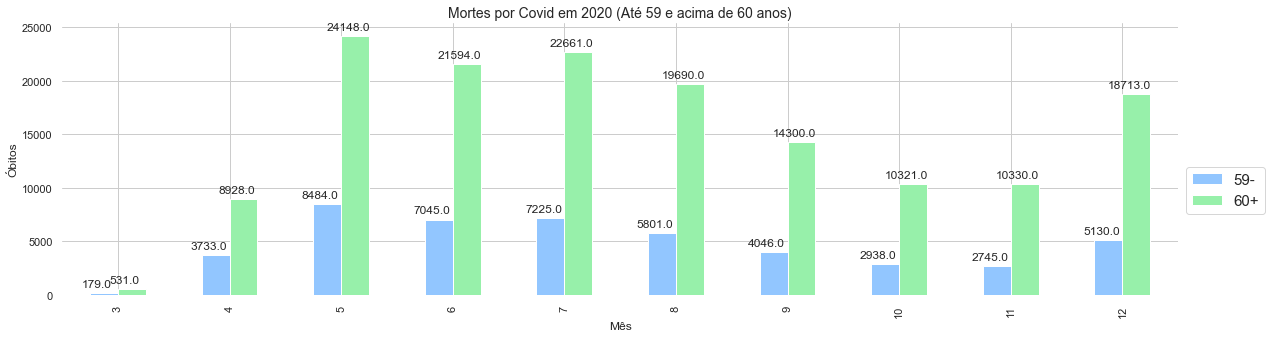

In [121]:
# Montando gráfico de barras 
mortes = df2020.drop(['NU_IDADE_N', 'CLASSI_FIN', 'EVOLUCAO'], axis=1)
mortes = mortes.groupby([mortes['agerange'], mortes['DT_EVOLUCA'].dt.month]).size()
ax = mortes.unstack(level=0).plot(kind='bar', figsize=(20,5))
ax.set_title('Mortes por Covid em 2020 (Até 59 e acima de 60 anos)', fontsize=14)
ax.set_xlabel('Mês')
ax.set_ylabel('Óbitos')
ax.legend(fontsize = 15, bbox_to_anchor=(1, 0.5))
ax.set_frame_on(False)
sns.set_style("whitegrid")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width()/4, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [34]:
# Agrupando mortes por mês e pelas faixas etárias selecionadas
df2021_mortes = df2021.groupby([df2021['agerange'], df2021['DT_EVOLUCA'].dt.month]).size()
df2021_mortes

agerange  DT_EVOLUCA
59-       1              6742
          2              6859
          3             19643
          4              5348
60+       1             22896
          2             19834
          3             43531
          4             10135
dtype: int64

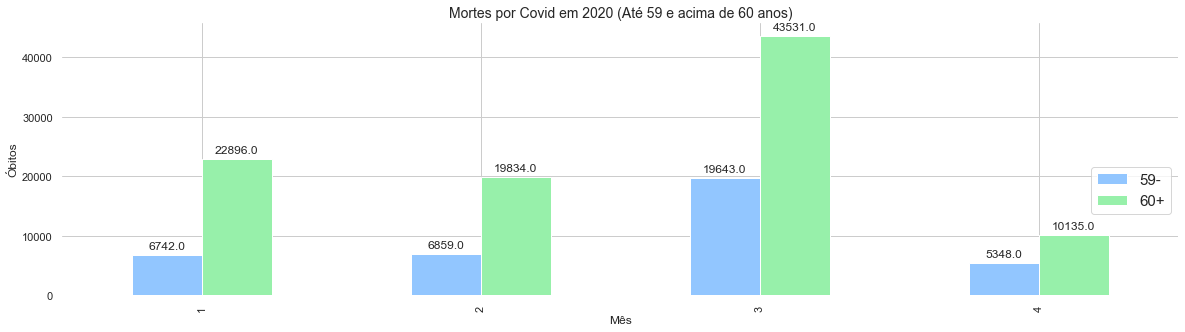

In [132]:
# Montando gráfico de barras 
mortes = df2021.drop(['NU_IDADE_N', 'CLASSI_FIN', 'EVOLUCAO'], axis=1)
mortes = mortes.groupby([mortes['agerange'], mortes['DT_EVOLUCA'].dt.month]).size()
ax = mortes.unstack(level=0).plot(kind='bar', figsize=(20,5))
ax.set_title('Mortes por Covid em 2020 (Até 59 e acima de 60 anos)', fontsize=14)
ax.set_xlabel('Mês')
ax.set_ylabel('Óbitos')
ax.legend(fontsize = 15, bbox_to_anchor=(1, 0.5))
ax.set_frame_on(False)
sns.set_style("whitegrid")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')